## DATA

Data Souce: https://www.kaggle.com/prasertk/netflix-subscription-price-in-different-countries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
import warnings
warnings.filterwarnings('ignore')

In [2]:
#getting data from API to further select current USD course
response = requests.get("http://api.nbp.pl/api/exchangerates/tables/a?format=json")
data = response.json()[0]
df_curr = pd.DataFrame(data)
df_curr["currency"] = df_curr["rates"].map(lambda x: x["currency"])
df_curr["code"] = df_curr["rates"].map(lambda x: x["code"])
df_curr["mid"] = df_curr["rates"].map(lambda x: x["mid"])
df_curr = df_curr.drop(["rates"], axis = 1)

In [3]:
#creating data frames
df_1 = pd.read_csv("/Users/kingaklejne/Documents/Rozwój/Netflix/netflix price in different countries.csv")
df_2 = pd.read_csv("/Users/kingaklejne/Documents/Rozwój/Netflix/Netflix subscription fee Dec-2021.csv")

In [4]:
#Checking if both tables have the same data
df_test = pd.merge(df_1, df_2, on = "Country", how = "outer").drop_duplicates().reset_index(drop = True)
df_test["Total Library Size match"] = df_test.apply(lambda x: x["Total Library Size_x"] == x["Total Library Size_y"], axis = 1)
df_test["No. of TV Shows match"] = df_test.apply(lambda x: x["No. of TV Shows_x"] == x["No. of TV Shows_y"], axis = 1)
df_test["No. of Movies match"] = df_test.apply(lambda x: x["No. of Movies_x"] == x["No. of Movies_y"], axis = 1)
df_test["Cost Per Month - Basic match"] = df_test.apply(lambda x: x["Cost Per Month - Basic ($)_x"] == x["Cost Per Month - Basic ($)_y"], axis = 1)
df_test["Cost Per Month - Standard match"] = df_test.apply(lambda x: x["Cost Per Month - Standard ($)_x"] == x["Cost Per Month - Standard ($)_y"], axis = 1)
df_test["Cost Per Month - Premium match"] = df_test.apply(lambda x: x["Cost Per Month - Standard ($)_x"] == x["Cost Per Month - Standard ($)_y"], axis = 1)

print(f"Total Library Size match: {df_test['Total Library Size match'].value_counts()}")
print(f"No. of TV Shows match: {df_test['No. of TV Shows match'].value_counts()}")
print(f"No. of Movies match: {df_test['No. of Movies match'].value_counts()}")
print(f"Cost Per Month - Basic match: {df_test['Cost Per Month - Basic match'].value_counts()}")
print(f"Cost Per Month - Standard match: {df_test['Cost Per Month - Standard match'].value_counts()}")
print(f"Cost Per Month - Premium match: {df_test['Cost Per Month - Premium match'].value_counts()}")

Total Library Size match: True    65
Name: Total Library Size match, dtype: int64
No. of TV Shows match: True    65
Name: No. of TV Shows match, dtype: int64
No. of Movies match: True    65
Name: No. of Movies match, dtype: int64
Cost Per Month - Basic match: True    65
Name: Cost Per Month - Basic match, dtype: int64
Cost Per Month - Standard match: True    65
Name: Cost Per Month - Standard match, dtype: int64
Cost Per Month - Premium match: True    65
Name: Cost Per Month - Premium match, dtype: int64


In [5]:
#defining final df
df = df_1.copy()
df = df.sort_values(by=["Country"]).reset_index(drop = True)

In [6]:
#checking info about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        65 non-null     object 
 1   Total Library Size             65 non-null     int64  
 2   No. of TV Shows                65 non-null     int64  
 3   No. of Movies                  65 non-null     int64  
 4   Cost Per Month - Basic ($)     65 non-null     float64
 5   Cost Per Month - Standard ($)  65 non-null     float64
 6   Cost Per Month - Premium ($)   65 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 3.7+ KB


In [7]:
df["Cost Per Month - Basic PLN"] = df["Cost Per Month - Basic ($)"] * df_curr[df_curr["code"] == "USD"]["mid"].values
df["Cost Per Month - Standard PLN"] = df["Cost Per Month - Standard ($)"] * df_curr[df_curr["code"] == "USD"]["mid"].values
df["Cost Per Month - Premium PLN"] = df["Cost Per Month - Premium ($)"] * df_curr[df_curr["code"] == "USD"]["mid"].values

In [8]:
#function for basic statistic
def statistics(column, no_highest, no_smallest):
    mean = round(df[column].mean())
    median = round(df[column].median())
    maximum = df[column].max()
    highest = df.nlargest(no_highest, column)
    smallest = df.nsmallest(no_smallest, column)
    
    return mean, median, maximum, highest, smallest

In [9]:
#function to make a plot
def make_plot(data, value, color, mean, median, maximum, max_value, title, top_values = False):
    """
    data - seleceted data frame
    value - name of column
    max_value - value of space between legend for reference lines
    top_values - False (deafult), to have line legend at the bottom of the page select True
    """
    #selecting size
    plt.figure(figsize=(15, 10))
    #adding grids
    sns.set_theme(style="whitegrid")
    #defininf plot
    graph = sns.barplot(x="Country", y=value, data=data, color = color)
    #rotation of countries' names
    plt.xticks(rotation=90)
    #reference lince
    graph.axhline(mean, linestyle = "--", color = "tab:olive")
    graph.axhline(median, linestyle = "--", color = "tab:orange")
    #legend for reference lines
    if top_values == True:
        for p in graph.patches:
            graph.annotate(format(p.get_height(), ".0f"), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = "center", va = "center", 
                       xytext = (0, 9), 
                       textcoords = "offset points")
        graph.text(0,0 + max_value, "Mean = {}".format(mean), size="large", color="tab:olive")    
        graph.text(0,0, "Median = {}".format(median), size="large", color="tab:orange")
    else:
        graph.text(0,maximum, "Mean = {}".format(mean), size="large", color="tab:olive")
        graph.text(0,maximum - max_value, "Median = {}".format(median), size="large", color="tab:orange")
    #title
    plt.title(title, fontsize=20);

## PLOTS

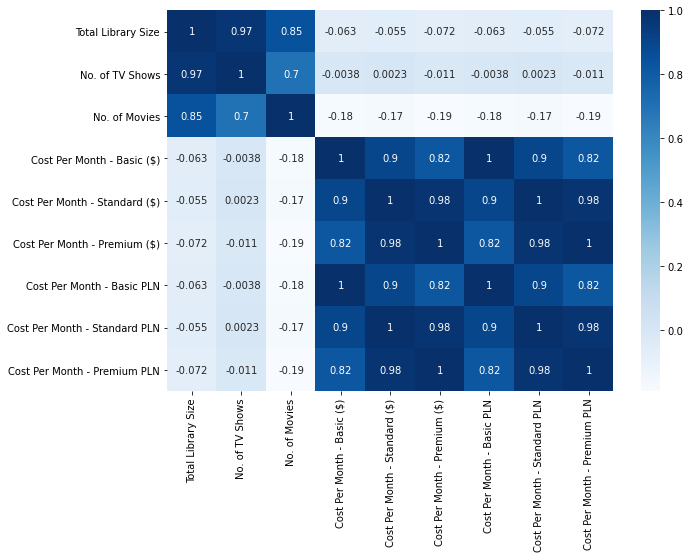

In [10]:
#correlation map
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True, cmap="Blues");

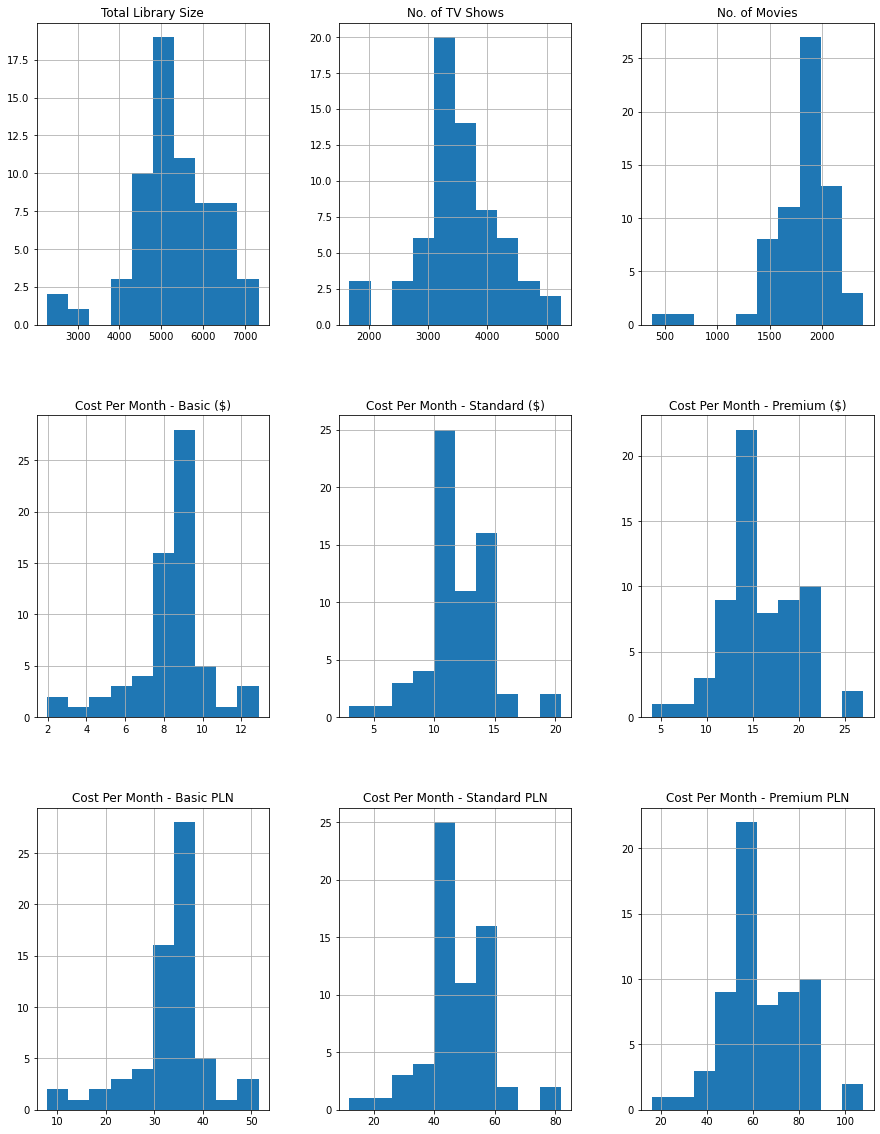

In [11]:
#histograms
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax);

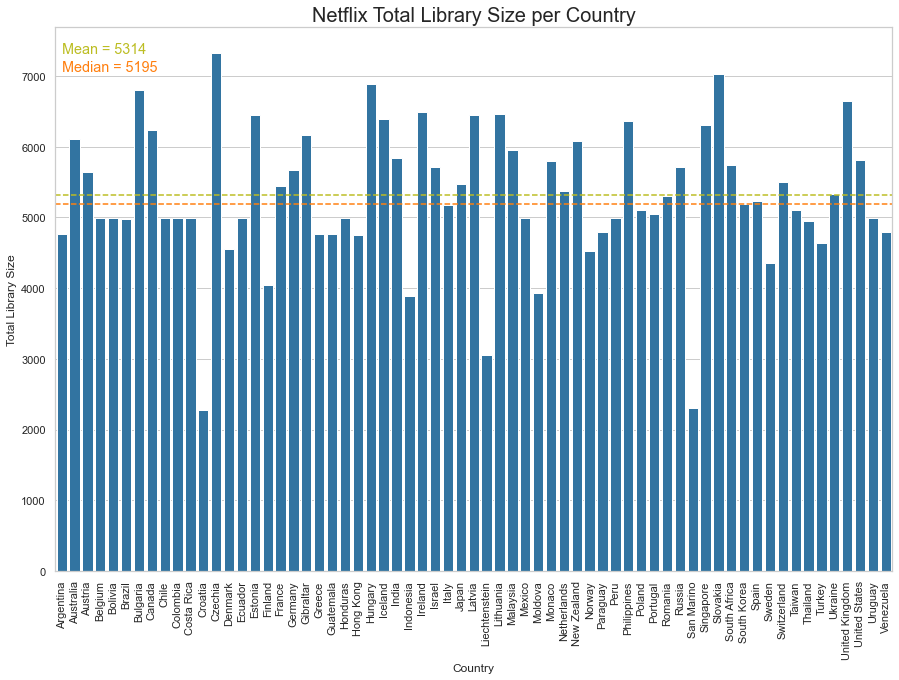

In [12]:
mean, median, maximum, highest, smallest = statistics("Total Library Size", 10, 10)
make_plot(df, "Total Library Size", "tab:blue", mean, median, maximum, 
          250, "Netflix Total Library Size per Country")

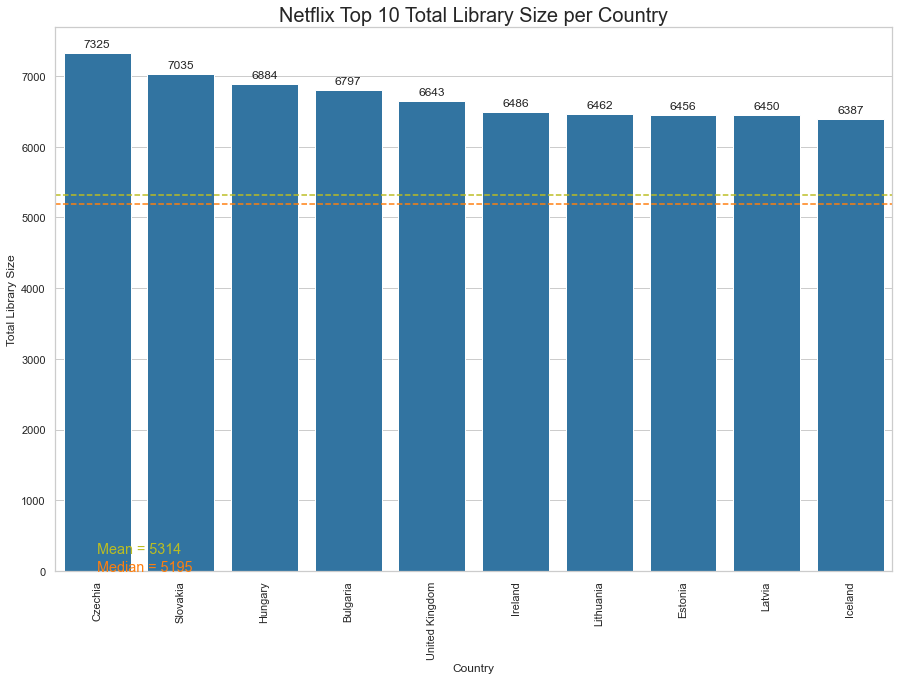

In [13]:
make_plot(highest, "Total Library Size", "tab:blue", mean, median, maximum, 
          250, "Netflix Top 10 Total Library Size per Country", top_values = True)

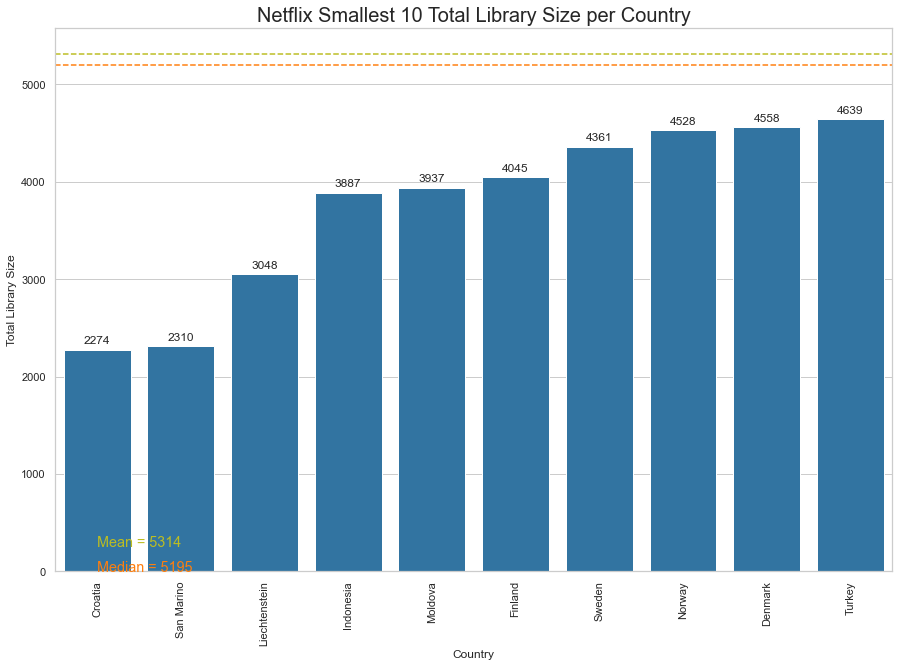

In [14]:
make_plot(smallest, "Total Library Size", "tab:blue", mean, median, maximum, 
          250, "Netflix Smallest 10 Total Library Size per Country", top_values = True)

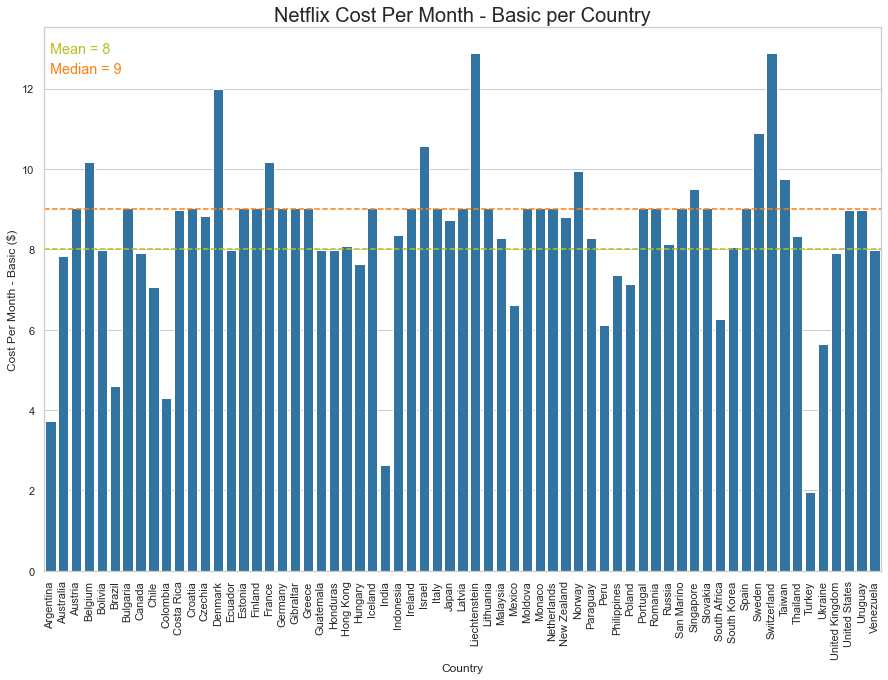

In [15]:
mean, median, maximum, highest, smallest = statistics("Cost Per Month - Basic ($)", 10, 10)
make_plot(df,"Cost Per Month - Basic ($)", "tab:blue", mean, median, maximum, 
          0.5, "Netflix Cost Per Month - Basic per Country")

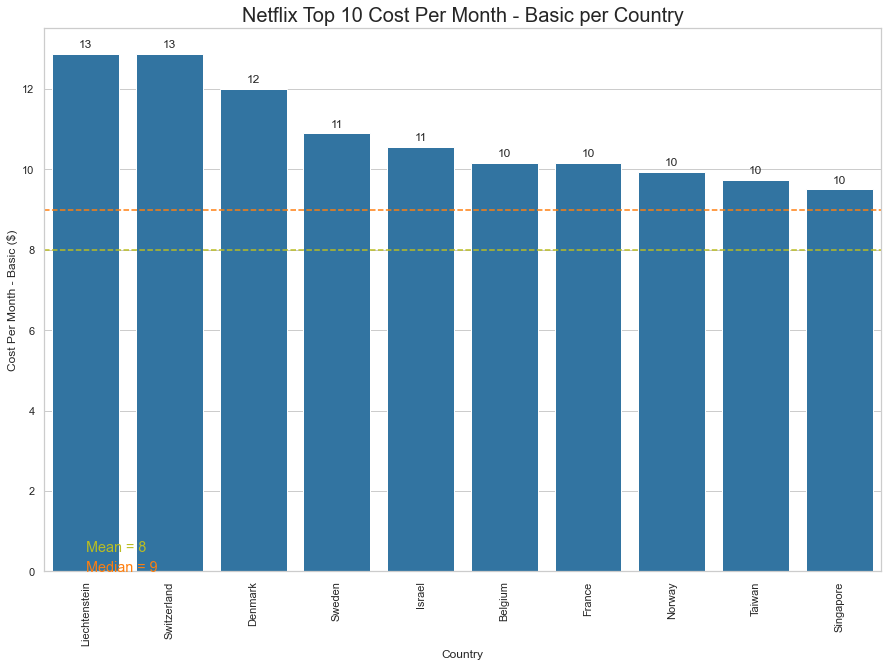

In [16]:
make_plot(highest,"Cost Per Month - Basic ($)", "tab:blue", mean, median, maximum,
          0.5, "Netflix Top 10 Cost Per Month - Basic per Country", top_values = True)

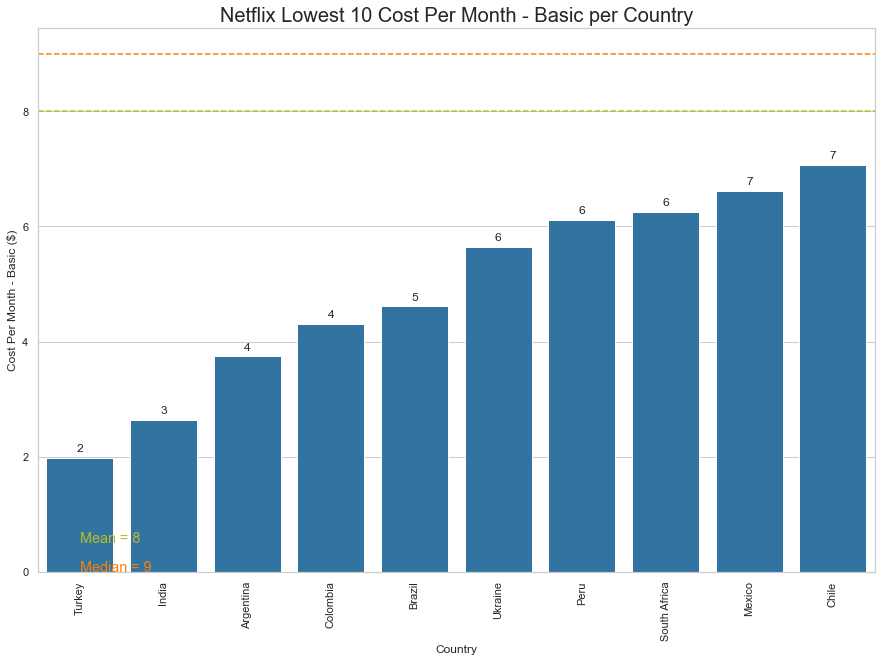

In [17]:
make_plot(smallest,"Cost Per Month - Basic ($)", "tab:blue", mean, median, maximum,
          0.5, "Netflix Lowest 10 Cost Per Month - Basic per Country", top_values = True)

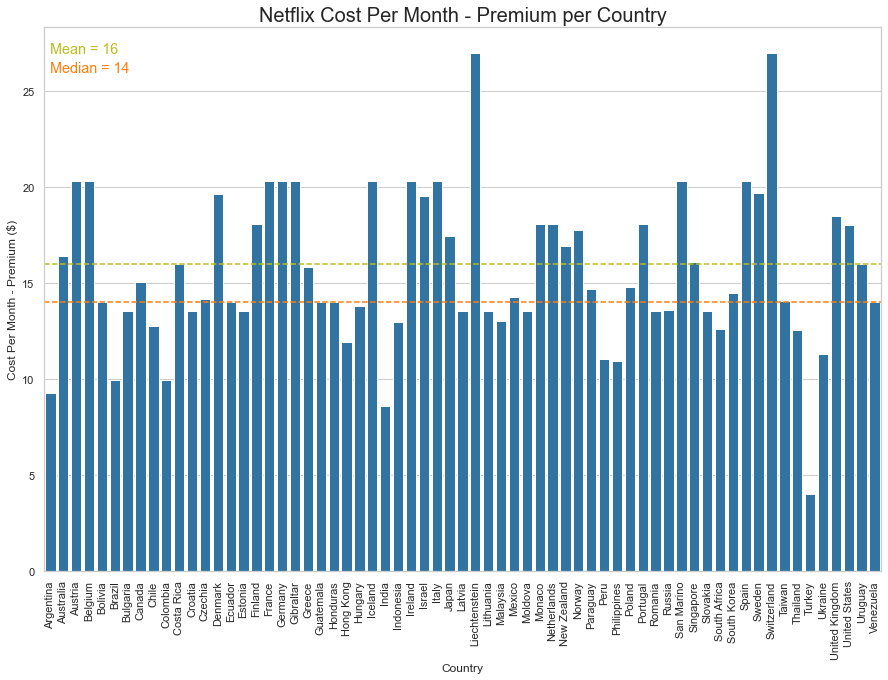

In [18]:
mean, median, maximum, highest, smallest = statistics("Cost Per Month - Premium ($)", 10, 10)
make_plot(df,"Cost Per Month - Premium ($)", "tab:blue", mean, median, maximum, 
          1, "Netflix Cost Per Month - Premium per Country")

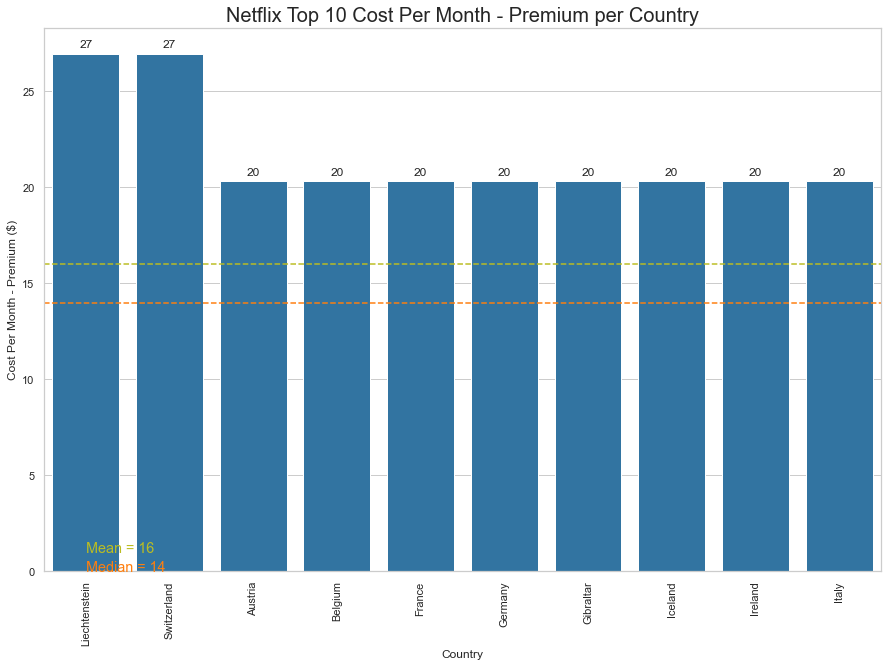

In [19]:
make_plot(highest ,"Cost Per Month - Premium ($)", "tab:blue", mean, median, maximum, 
          1, "Netflix Top 10 Cost Per Month - Premium per Country", top_values = True)

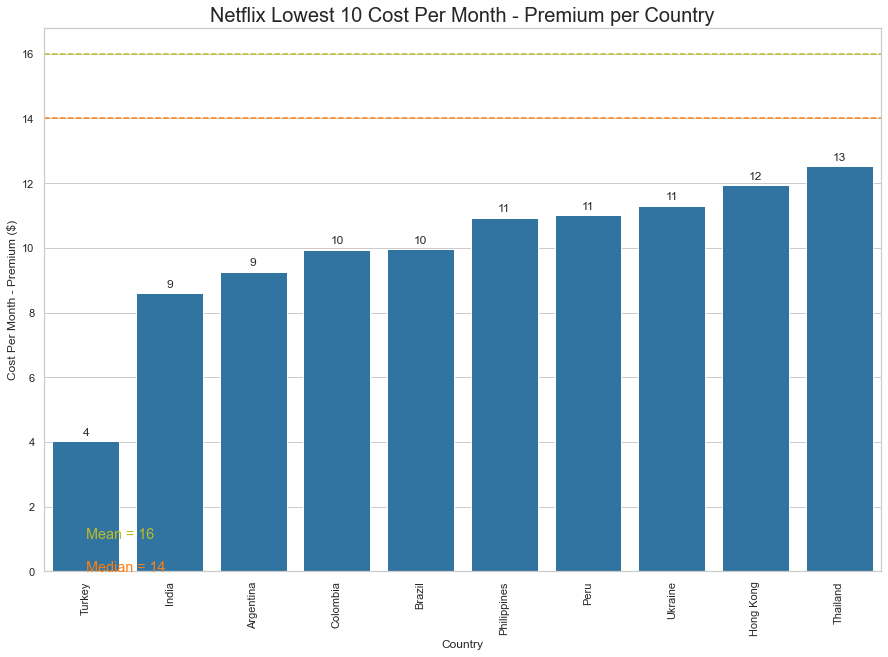

In [20]:
make_plot(smallest ,"Cost Per Month - Premium ($)", "tab:blue", mean, median, maximum, 
          1, "Netflix Lowest 10 Cost Per Month - Premium per Country", top_values = True)

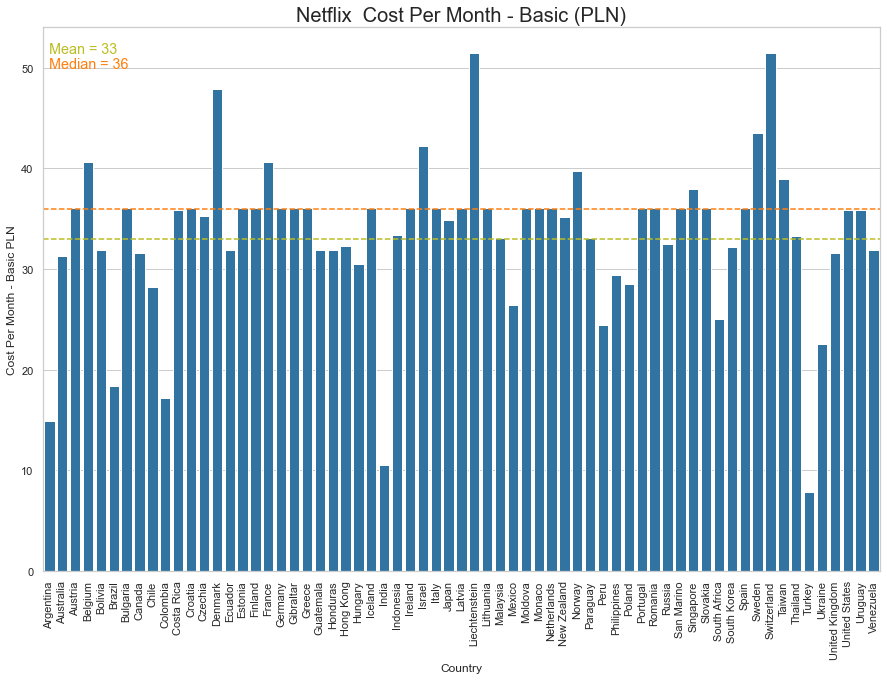

In [21]:
mean, median, maximum, highest,smallest = statistics("Cost Per Month - Basic PLN", 10, 10)
make_plot(df ,"Cost Per Month - Basic PLN", "tab:blue", mean, median, maximum, 
          1.5, "Netflix  Cost Per Month - Basic (PLN)")

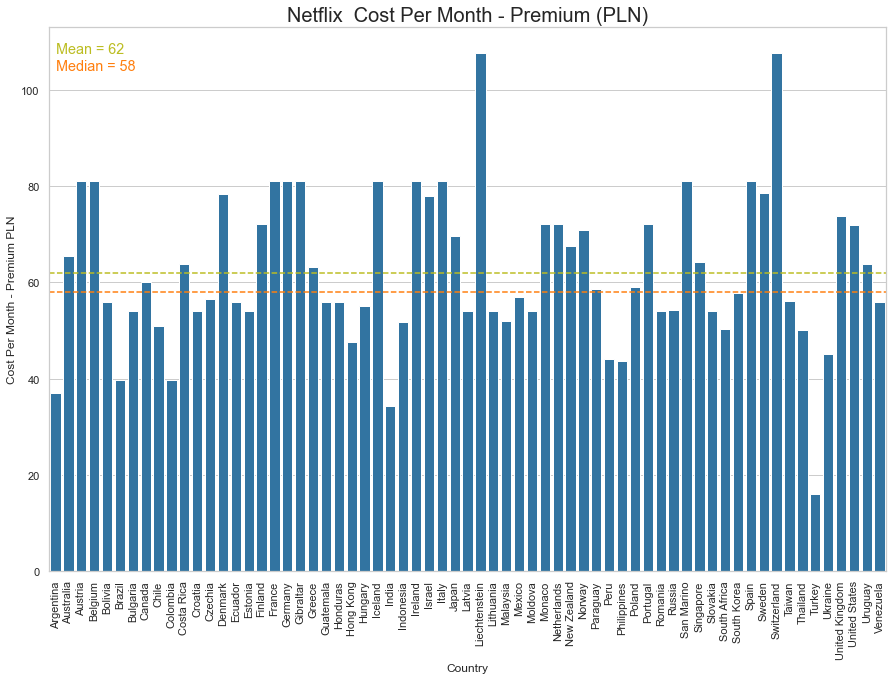

In [22]:
mean, median, maximum, highest, smallest = statistics("Cost Per Month - Premium PLN", 10, 10)
make_plot(df ,"Cost Per Month - Premium PLN", "tab:blue", mean, median, maximum, 
          3.5, "Netflix  Cost Per Month - Premium (PLN)")

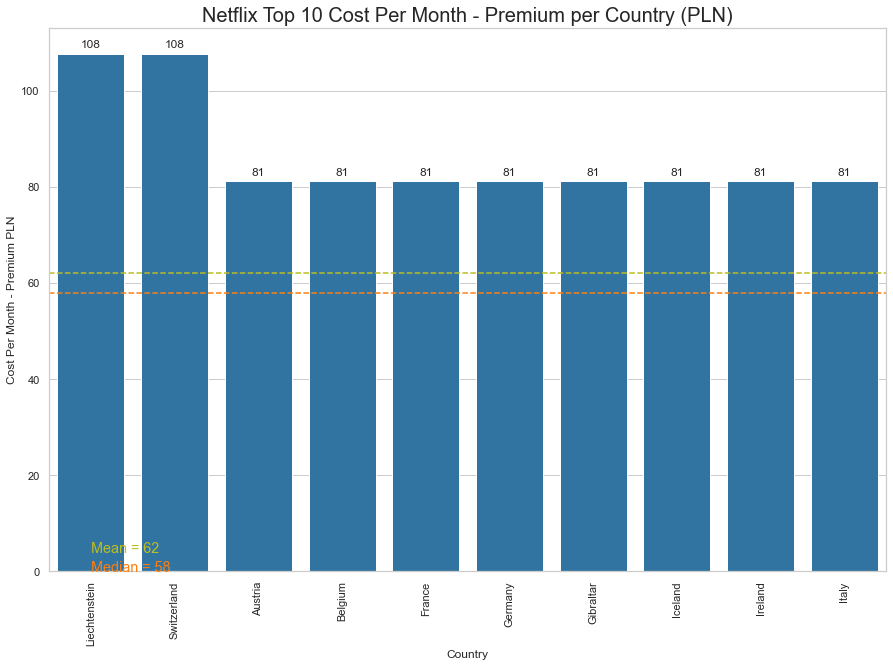

In [23]:
make_plot(highest ,"Cost Per Month - Premium PLN", "tab:blue", mean, median, maximum, 
          4, "Netflix Top 10 Cost Per Month - Premium per Country (PLN)", top_values = True)

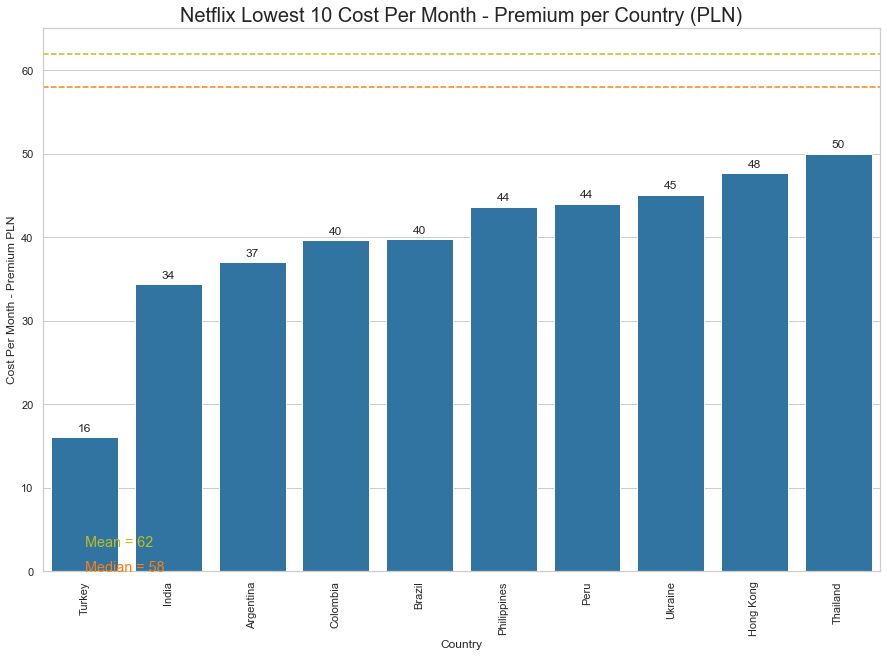

In [24]:
make_plot(smallest ,"Cost Per Month - Premium PLN", "tab:blue", mean, median, maximum, 
          3, "Netflix Lowest 10 Cost Per Month - Premium per Country (PLN)", top_values = True)